# Introdução

- Análise e mineração da base "Bank Marketing Data Set" 
- Além do lado "técnico", tentar-se-á seguir a metodologia do CRISP-DM   
- Fonte: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing 
- Algoritmo utilizado: regressão logística


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve


# 

from sklearn.linear_model import LogisticRegression



----


# 1-) Entendimento do Negócio
- Problema específico da área de marketing de um banco português
- Campanha direta de marketing (baseada em chamadas telefônicas - telemarketing 
    - As vezes mais de um contato era necessário

- Objetivo : 
    - Técnico: prever (classificar) se um cliente vai aderir ou não da forma mais eficiente possível
    - Negócios: obter maiores ganhos financeiros para banco (ROI) a partir de modelos mais eficientes , otimizando os gastos com propaganda
    -  Extras
        - Analisar o que a empresa deve concentrar para ter mais probabilidade de efetividade
        - Pensar em quais KPIs o banco pode medir o sucesso dessa aplicação
        




----

# 2-) Entendimento dos dados


## _input variables_:
* ### **bank client data**:
    * 1 - age (numeric)

    * 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

    * 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

    * 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    * 5 - default: has credit in default? (categorical: 'no','yes','unknown')
    * 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    * 7 - loan: has personal loan? (categorical: 'no','yes','unknown')


* ### **related with the last contact of the current campaign**:
    * 8 - contact: contact communication type (categorical: 'cellular','telephone')
    * 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    * 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    * 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* ### **other attributes**:
    * 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    * 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    * 14 - previous: number of contacts performed before this campaign and for this client (numeric)
    * 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* ### **social and economic context attributes**
    * 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    * 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    * 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    * 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    * 20 - nr.employed: number of employees - quarterly indicator (numeric)

### __Output variable (desired target):__

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')





### 2.1-) Primeiro contato com os dados

In [2]:
# possui dados adicionais que segundo  "Moro, P. Cortez and P. Rita" 
bank_data_extra= pd.read_csv("dados/bank-additional-full.csv",sep=';') 

In [3]:
bank_data =pd.read_csv("dados/bank-full.csv",sep=';')

In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 2.2 Checando existência de dados faltantes

- Trecho presente na descrição da base : 
"_Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques._"

In [9]:
# isso pode causar uma falsa ideia que não há valores faltantes (importante ler a descrição)
print(bank_data.isnull().values.any())
print(bank_data.isna().values.any())

False
False


In [10]:
bank_data.isin(["unknown"]).any() # checando a existência de observações com "unknown"

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool

In [11]:
bank_data.isin(["unknown"]).sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [12]:
bank_data.shape[0]

45211

In [13]:
bank_data.isin(["unknown"]).sum()/bank_data.shape[0] #proporção 

age          0.000000
job          0.006370
marital      0.000000
education    0.041074
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.287983
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.817478
y            0.000000
dtype: float64

Três possíveis ações:
* Deletar 
* Manter e encarar como uma categoria
* Substituir por outros valores

### 2.3 EDA

In [14]:
categoricas = []

for col in bank_data.drop("y",axis=1).columns:
    if bank_data[col].dtype == 'object':
        categoricas.append(col)

In [15]:
categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [16]:
%matplotlib inline

* Entendendo as variáveis categóricas

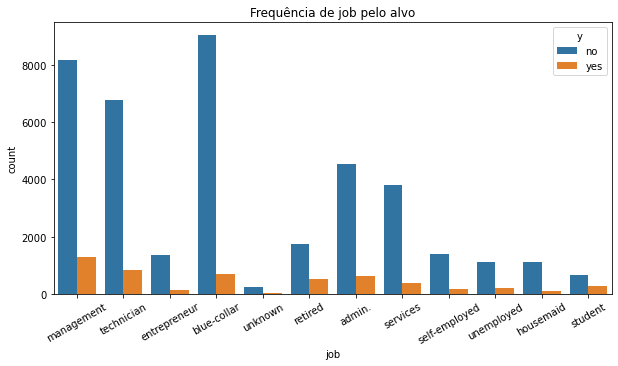

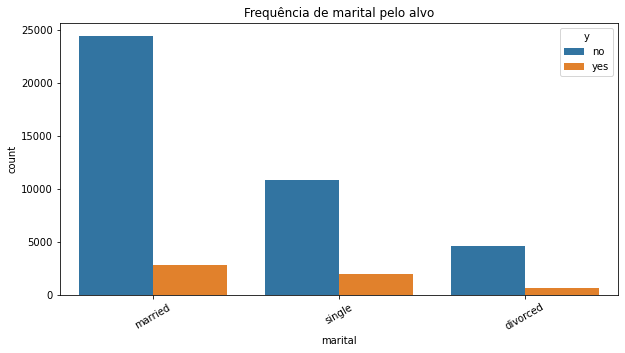

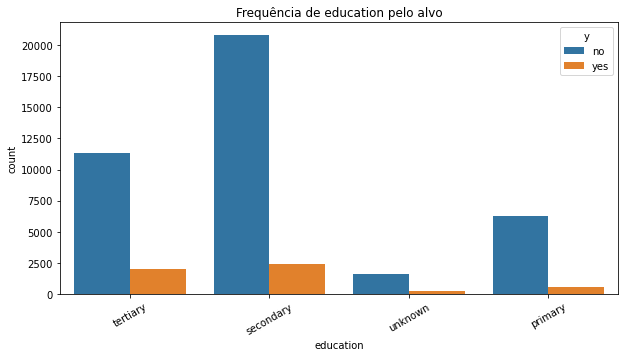

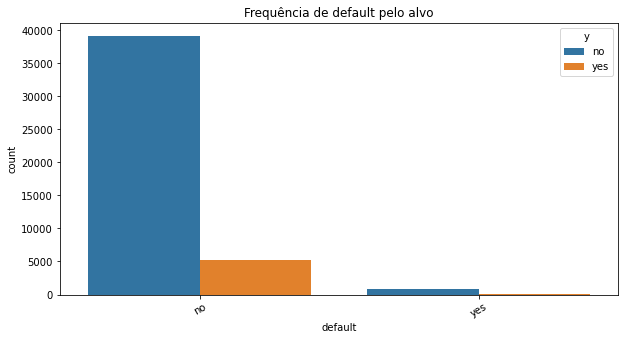

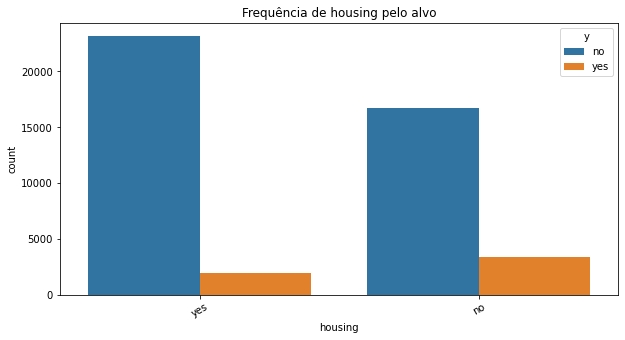

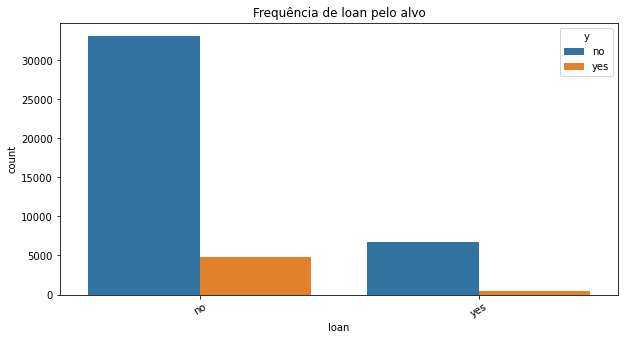

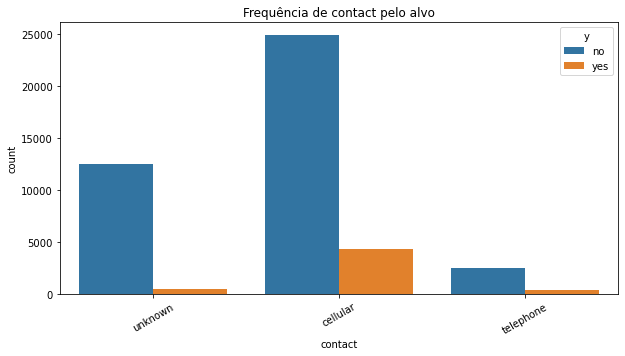

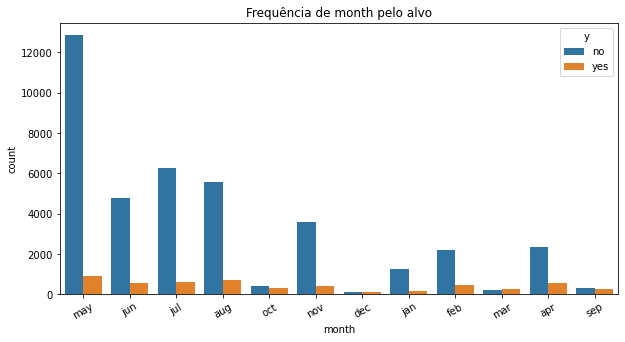

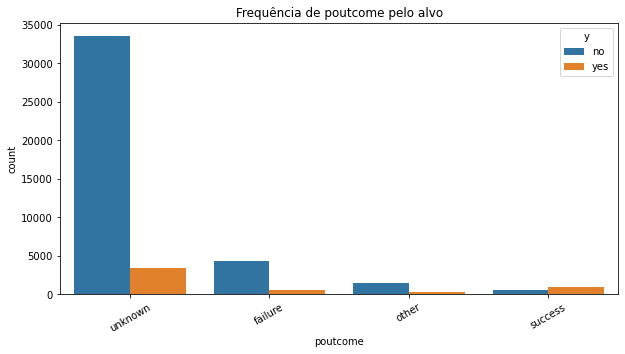

In [17]:
for feature in categoricas:
    plt.figure(figsize=(10,5))
    plt.title(f'Frequência de {feature} pelo alvo')
   
    ax = sns.countplot(x=feature,hue= "y" ,data = bank_data)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

    plt.show()

In [18]:
for feature in categoricas: 
    print("-------------------------------")
    print(round(pd.crosstab(index=bank_data[feature],columns=bank_data['y'])/bank_data.shape[0],2))
    print("-------------------------------")


-------------------------------
y                no   yes
job                      
admin.         0.10  0.01
blue-collar    0.20  0.02
entrepreneur   0.03  0.00
housemaid      0.03  0.00
management     0.18  0.03
retired        0.04  0.01
self-employed  0.03  0.00
services       0.08  0.01
student        0.01  0.01
technician     0.15  0.02
unemployed     0.02  0.00
unknown        0.01  0.00
-------------------------------
-------------------------------
y           no   yes
marital             
divorced  0.10  0.01
married   0.54  0.06
single    0.24  0.04
-------------------------------
-------------------------------
y            no   yes
education            
primary    0.14  0.01
secondary  0.46  0.05
tertiary   0.25  0.04
unknown    0.04  0.01
-------------------------------
-------------------------------
y          no   yes
default            
no       0.87  0.12
yes      0.02  0.00
-------------------------------
-------------------------------
y          no   yes
housing    

In [19]:
for feature in categoricas: 
    print("-------------------------------")
    print(pd.crosstab(index=bank_data[feature],columns=bank_data['y']))
    print("-------------------------------")


-------------------------------
y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34
-------------------------------
-------------------------------
y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912
-------------------------------
-------------------------------
y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
unknown     1605   252
-------------------------------
-------------------------------
y           no   yes
default             
no       39159  5237
yes        763    52
-------------------------------
-------------------------------
y           no  

<AxesSubplot:xlabel='y', ylabel='count'>

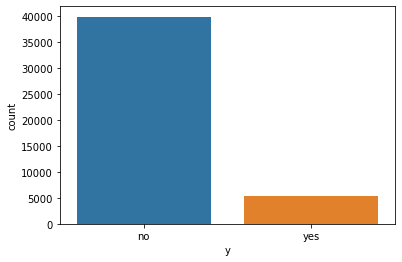

In [20]:
sns.countplot(x="y", data = bank_data) # checando a proporção dos dados 

* Faz sentido estar balanceada: uma campanha de telemarketing vai receber muito mais "Nãos" do que "Sim"
* Um pouco desbalanceado (há bases mais desbalanceadas) 
* Se o modelo chutar todas como "no", terá uma acurácia de 88% (para exemplificar isso é possível fazer um DummyClassifier)
* Nesses cenários a Curva ROC é um melhor avaliador , assim como precision e recall
* Em alguns algoritmos existe um parâmetro  


In [21]:
# um pouco desbalanceado (há bases mais desbalanceadas) 
# se o modelo chutar todas como "no", terá uma acurácia de 88%
bank_data['y'].value_counts()/bank_data.shape[0] 

no     0.883015
yes    0.116985
Name: y, dtype: float64

* Entendendo as variáveis numéricas

In [22]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [23]:
numericas = []

for col in bank_data.drop("y",axis=1).columns:
    if bank_data[col].dtype != 'object':
        numericas.append(col)

In [24]:
numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

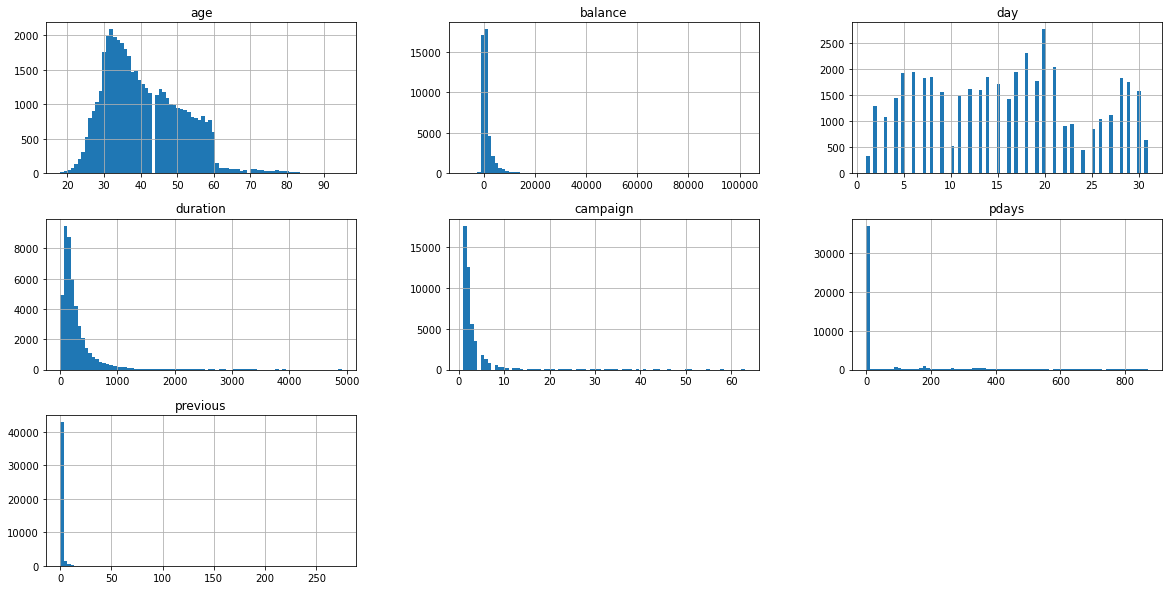

In [25]:
bank_data[numericas].hist(bins=80)
plt.gcf().set_size_inches(20, 10)

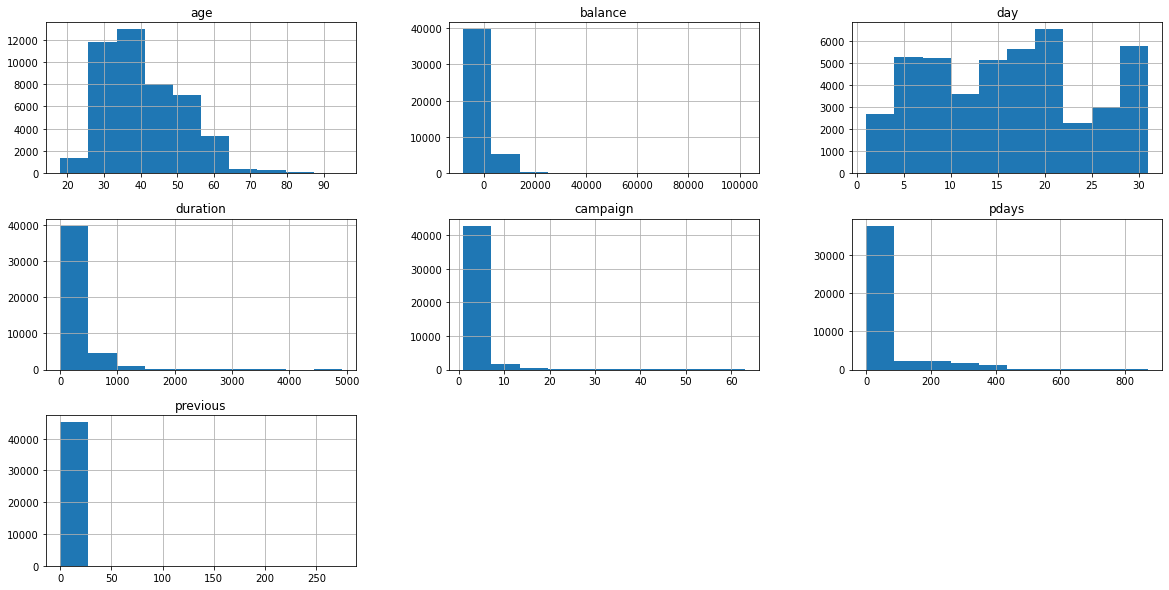

In [26]:
bank_data[numericas].hist()
plt.gcf().set_size_inches(20, 10)

* Penso em retirar a "duration" , segundo a nota explicativa ela não possui uma significância realística

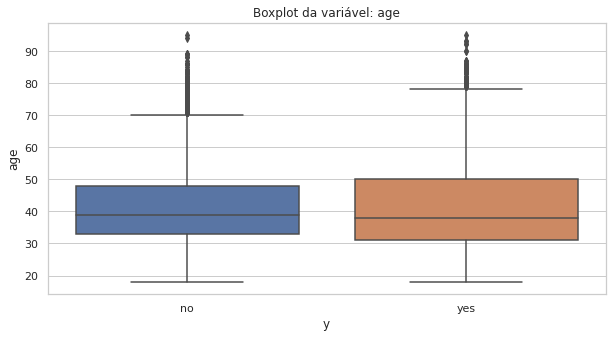

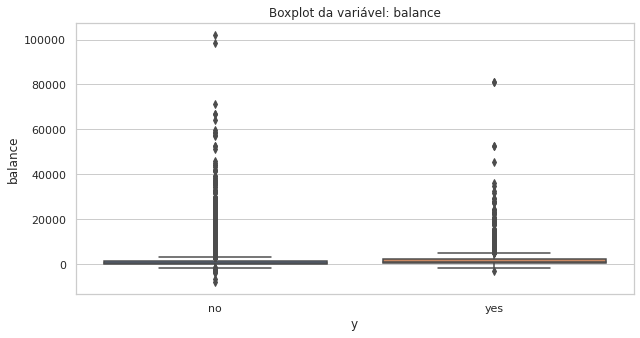

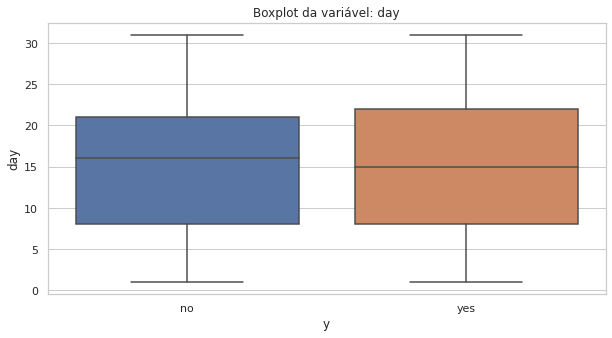

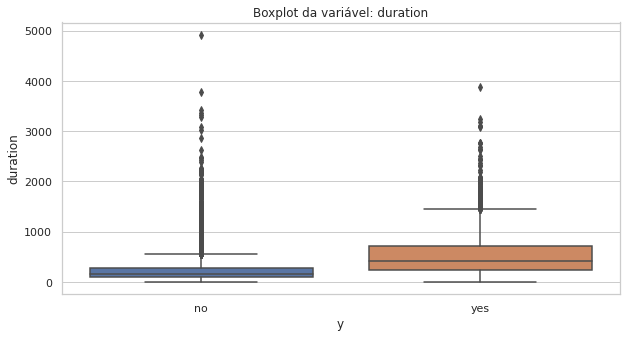

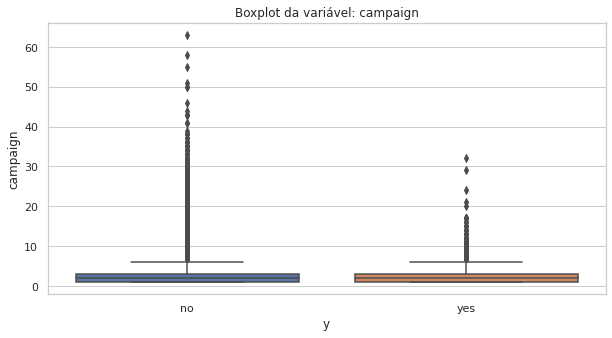

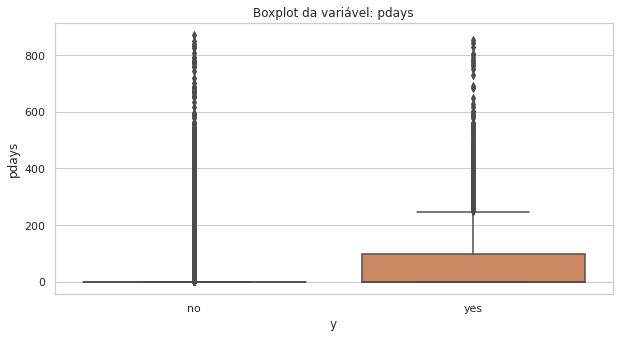

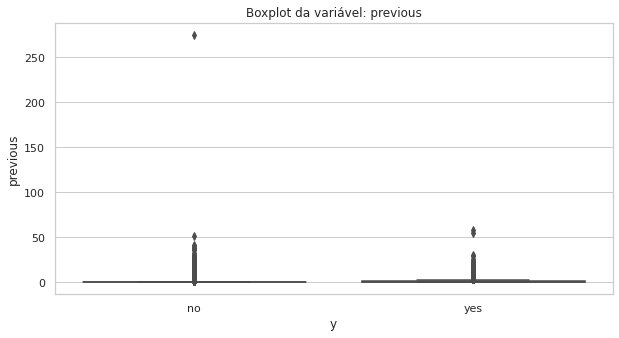

In [27]:
for n in numericas:
    plt.figure(figsize=(10,5))  
    sns.set_theme(style="whitegrid") 
    plt.title(f'Boxplot da variável: {n}')
    ax = sns.boxplot(x="y", y=n, data=bank_data) 

    plt.show()


* Pontos a se notar :
    * em em algumas variáveis existem muitos outliers
    * É possível ver certa "defasagem" nos boxplots: durations, pdays
    * É possível ver certa "defasagem" em menor grau nos boxplots: durations, pdays , days e age
    * Essas diferenças na defasagem 

* A relação entre o alvo e a variável tem que ser preferencialmente linear
    * isso "facilita" para o modelo (exemplo: chance de câncer e idade >>> + velho >>> + chance de ter câncer)
    * É  necessário testar se devo discretizar algumas variáveis (testar com e sem) 
        * Ainda nessa linha podemos variar o número de agrupamentos 

### 2.4 Correlação

In [28]:
bank_data.drop("y",axis=1).corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


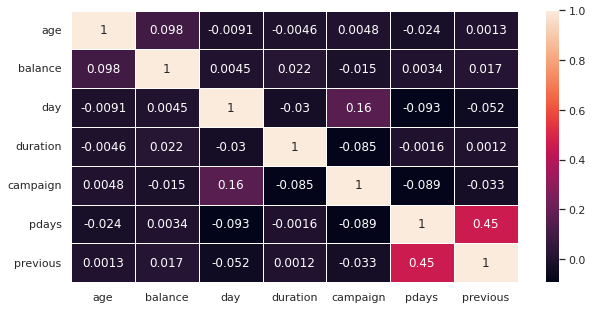

In [29]:
plt.figure(figsize=(10,5))  
sns.heatmap(bank_data.drop("y",axis=1).corr(),annot=True,linewidths=.5)
plt.show()

----

### 3-) Pré-processamento v.1 (para a regressão logística)

### 3.1: Tratando variáveis categóricas
- Onehot encoding: modelo mode ver uma ordem caso for utilizado o LabelHot
- Tradeoff: aumento de dimensionalidade
### 3.2: Feature Scaling das variáveis numéricas
- Método escolhido : MinMax (StandartScaller não é tão eficiente  para lidar com outlier )
- Também é uma opção discretizar (processo de "binning") das variáveis numéricas  (será tentado em outro pré-processamento)
    - Podemos discretizar e manter as numéricas
### 3.3: valores faltantes
- decidi mantê-los como "unknown"
- Uma ideia seria tirar a coluna "poutcome", a qual possuí  + de 80% unknown


In [30]:
bank_data['y'] = np.where(bank_data['y']=='no',0,1)

In [31]:
df_v1 = bank_data.copy().drop("y",axis=1)

In [32]:
categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [33]:
numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [34]:
full_pipeline_v1 = ColumnTransformer([
    ("num",MinMaxScaler(),numericas),
    ("cat",OneHotEncoder(),categoricas)
])

In [35]:
df_v1 = full_pipeline_v1.fit_transform(df_v1)

In [36]:
df_v1

array([[0.51948052, 0.09225936, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       [0.33766234, 0.07306666, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.07282153, 0.13333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.7012987 , 0.12468905, 0.53333333, ..., 0.        , 1.        ,
        0.        ],
       [0.50649351, 0.07886805, 0.53333333, ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.09977666, 0.53333333, ..., 1.        , 0.        ,
        0.        ]])

In [37]:
X_v1 = df_v1
y_v1 = bank_data["y"].values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_v1,y_v1, stratify=y_v1 , random_state=14, test_size=0.3)

---

# 4-) Modelagem: Regressão logística

* __Dicas RegLog__:
    - Principais parâmetros:
        - alpha (parâmetro de regularização)
        - penalty: tipo de regularização
            - L1: Lasso 
                - Usar se assumirmos que poucos dos atributos
                - Pode ser útil também se caso a interpretabilidade seja importante (usa apenas poucas features, fica mais )
            - L2: Ridge 
                - Pode ser mais rápida em datasets grandes
        - solver :
            - sag : para datasets grandes (outras opções "SGDClassifier" ou "SGDRegressor")

* Vantagens de modelos lineares: 
    - fáceis de entender (previsão pode ser entendida por meio das fórmulas)
        - Porém: não é muito claro por que os coeficientes são do jeito que são (principalmente com features muito correlatas)
    - Performam bem quando o número de features é grande comparado ao número de amostras
    - Também são muito usados em datasets com muitas linhas quando outros modelos são muito difíceis de serem treinados 
        - Em espaços dimensionais pequenos , outros modelos podem generalizar melhor a performance (ex: kenelized support vector machines)




### Primeira versão do modelo:
* Sem otimização dos parâmetros
* Utilizando o parâmetro class_weight = "balanced" para lidar com o desbalanceamento
*  ResumoPré-processamento V1 : 
    * One Hot encoding
    * Min max  scalling
    * Dados faltantes  ("unknown") mantidos 

In [39]:
lr_v1 = LogisticRegression(class_weight="balanced",max_iter=500) 

In [40]:
lr_v1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [41]:
lr_v1.score(X_train,y_train)

0.84516699845167

In [42]:
lr_v1.score(X_test,y_test)

0.8495281627838396

In [43]:
y_pred_v1 = lr_v1.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred_v1)

0.8495281627838396

In [45]:
print(confusion_matrix(y_test,y_pred_v1))

[[10195  1782]
 [  259  1328]]


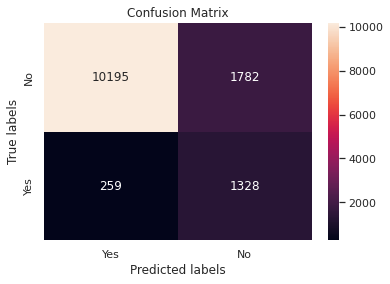

In [46]:

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_v1), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [47]:
print(classification_report(y_test,y_pred_v1))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     11977
           1       0.43      0.84      0.57      1587

    accuracy                           0.85     13564
   macro avg       0.70      0.84      0.74     13564
weighted avg       0.91      0.85      0.87     13564



In [48]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_v1).ravel()

In [49]:
def classification_metrics(true,pred):
    tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
    print("accuracy_score: ",accuracy_score(true,pred))
    print("Area Under the curve (roc_auc_score): ",roc_auc_score(true,pred))
    print("f1_score",f1_score(true,pred))
    print("precision_score: ",precision_score(true,pred))
    print("Sensitivity: ",recall_score(true,pred)) # recall == TP rate == Sensitivity
    print("Specificity: ",tn / (tn+fp)) # Specificity == TN rate
    print("FP rate: ",fp/(fp+tn)) 

In [50]:
classification_metrics(y_test,y_pred_v1)

accuracy_score:  0.8495281627838396
Area Under the curve (roc_auc_score):  0.8440069101147921
f1_score 0.5654673195656802
precision_score:  0.4270096463022508
Sensitivity:  0.8367989918084436
Specificity:  0.8512148284211405
FP rate:  0.14878517157885948


In [51]:
def plot_roc_curve(test,probs,label_graph,title):
    fpr, tpr, thresholds = roc_curve(test,probs)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label='aaaa')
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.show()

In [52]:
y_pred_prob_v1 = lr_v1.predict_proba(X_test)[:,1]

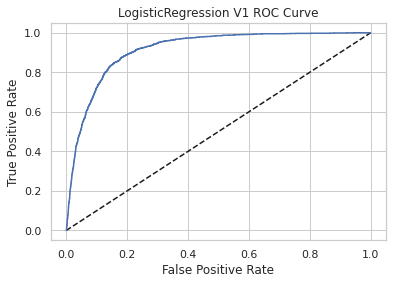

In [53]:
plot_roc_curve(y_test,y_pred_prob_v1,label_graph="LogisticRegression V1",title="LogisticRegression V1 ROC Curve")

----

# 4.2 Regressão logística com outros pré-processamentos

## Modelo  V2

In [54]:
full_pipeline_v2 = ColumnTransformer([
    ("num",MinMaxScaler(),numericas),
    ("cat",OrdinalEncoder(),categoricas)
])

full_pipeline_v2

X_v2 = bank_data.copy().drop("y",axis=1)
X_v2 = full_pipeline_v2.fit_transform(X_v2)

y_v2 = bank_data["y"].values

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2,y_v2, 
            stratify=y_v2 , random_state=14, test_size=0.3)


In [55]:
pd.DataFrame(X_v2,columns= numericas+ categoricas )

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,4.0,1.0,2.0,0.0,1.0,0.0,2.0,8.0,3.0
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,9.0,2.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,2.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,1.0,1.0,3.0,0.0,1.0,0.0,2.0,8.0,3.0
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,11.0,2.0,3.0,0.0,0.0,0.0,2.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000,9.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,3.0
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909,5.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,2.0
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000,1.0,1.0,1.0,0.0,0.0,0.0,1.0,9.0,3.0


In [56]:
lr_v2 = LogisticRegression(class_weight="balanced",max_iter=500) 
lr_v2.fit(X_train_v2,y_train_v2)
print("Train Score",lr_v2.score(X_train_v2,y_train_v2))
print("Test Score",lr_v2.score(X_test_v2,y_test_v2))
y_pred_v2 = lr_v2.predict(X_test_v2)
y_pred_prob_v2 = lr_v2.predict_proba(X_test_v2)[:,1]

Train Score 0.8011817865832465
Test Score 0.8053671483338248


### Avaliando os resultados 

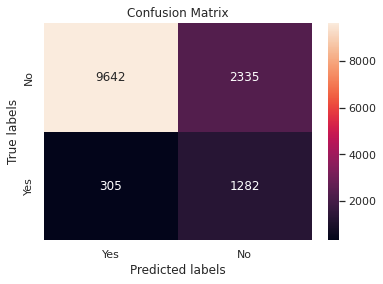

In [57]:

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test_v2,y_pred_v2), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [58]:
print(classification_report(y_test_v2,y_pred_v2))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     11977
           1       0.35      0.81      0.49      1587

    accuracy                           0.81     13564
   macro avg       0.66      0.81      0.69     13564
weighted avg       0.90      0.81      0.83     13564



In [59]:
classification_metrics(y_test_v2,y_pred_v2)

accuracy_score:  0.8053671483338248
Area Under the curve (roc_auc_score):  0.8064282418218199
f1_score 0.4926979246733283
precision_score:  0.35443737904340616
Sensitivity:  0.8078134845620668
Specificity:  0.8050429990815731
FP rate:  0.194957000918427


O modelo V1 foi melhor em todos as métricas

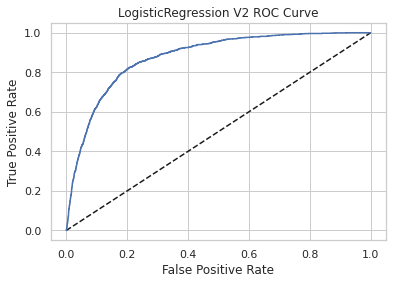

In [60]:
# sem muitas diferenças
plot_roc_curve(y_test_v2,y_pred_prob_v2,label_graph="LogisticRegression V2",title="LogisticRegression V2 ROC Curve")

### Modelo V3

In [61]:
full_pipeline_v3 = ColumnTransformer([
    ("num",StandardScaler(),numericas),
    ("cat",OneHotEncoder(),categoricas)
])

full_pipeline_v3

X_v3 = bank_data.copy().drop("y",axis=1)
X_v3 = full_pipeline_v3.fit_transform(X_v3)

y_v3 = bank_data["y"].values

X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X_v3,y_v3, 
            stratify=y_v3 , random_state=14, test_size=0.3)



lr_v3 = LogisticRegression(class_weight="balanced",max_iter=500) 
lr_v3.fit(X_train_v3,y_train_v3)
print("Train Score",lr_v3.score(X_train_v3,y_train_v3))
print("Test Score",lr_v3.score(X_test_v3,y_test_v3))
y_pred_v3 = lr_v3.predict(X_test_v3)
y_pred_prob_v3 = lr_v3.predict_proba(X_test_v3)[:,1]


Train Score 0.8431130912882737
Test Score 0.8468003538779121


### Avaliando os resultados V3


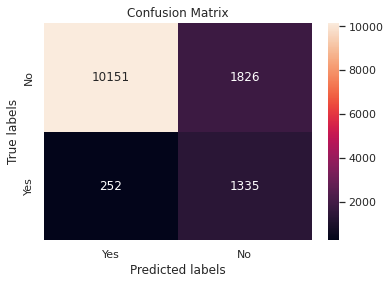

In [62]:

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test_v3,y_pred_v3), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [63]:
print(classification_report(y_test_v3,y_pred_v3))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     11977
           1       0.42      0.84      0.56      1587

    accuracy                           0.85     13564
   macro avg       0.70      0.84      0.73     13564
weighted avg       0.91      0.85      0.87     13564



In [64]:
classification_metrics(y_test_v3,y_pred_v3)

accuracy_score:  0.8468003538779121
Area Under the curve (roc_auc_score):  0.8443754751742985
f1_score 0.5623420387531594
precision_score:  0.4223347042075293
Sensitivity:  0.8412098298676749
Specificity:  0.8475411204809218
FP rate:  0.15245887951907824


Sensitividade Um pouco melhor e Especificidade um pouco pior (o restante foi praticamente igual)

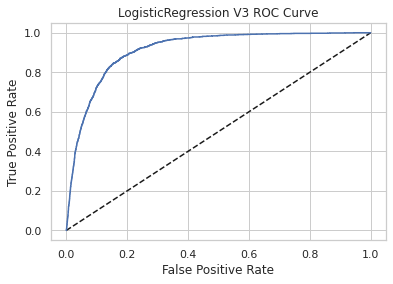

In [65]:
# sem muitas diferenças
plot_roc_curve(y_test_v3,y_pred_prob_v3,label_graph="LogisticRegression V3",title="LogisticRegression V3 ROC Curve")

### Modelo V4
- Usando as mesmas características do modelo V1
- aplicando técnicas de upsampling (sempre quero ter mais dados , acho intuitivamente melhor que downsampling mas não custa tentar)

In [66]:
from sklearn.utils import resample

mask = bank_data["y"] == 1
yes_df = bank_data[mask]
no_df = bank_data[~mask]

df_upsample = resample(
    yes_df, 
    replace=True, 
    n_samples=len(no_df),  
    random_state = 14
)

bank_data_upsampled = pd.concat([no_df,df_upsample])

<AxesSubplot:xlabel='y', ylabel='count'>

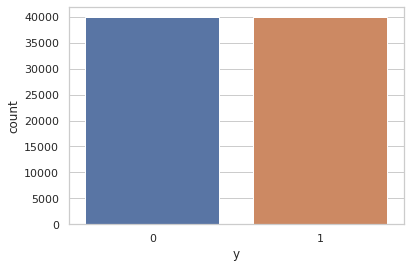

In [67]:
sns.countplot(x="y", data = bank_data_upsampled) # checando a proporção dos dados 

In [68]:
full_pipeline_v4 = ColumnTransformer([
    ("num",MinMaxScaler(),numericas),
    ("cat",OneHotEncoder(),categoricas)
])

full_pipeline_v4

X_v4 = bank_data_upsampled.copy().drop("y",axis=1)
X_v4 = full_pipeline_v4.fit_transform(X_v4)

y_v4 = bank_data_upsampled["y"].values

X_train_v4, X_test_v4, y_train_v4, y_test_v4 = train_test_split(X_v4,y_v4, 
            stratify=y_v4 , random_state=14, test_size=0.3)



lr_v4 = LogisticRegression(max_iter=500) 
lr_v4.fit(X_train_v4,y_train_v4)
print("Train Score",lr_v4.score(X_train_v4,y_train_v4))
print("Test Score",lr_v4.score(X_test_v4,y_test_v4))
y_pred_v4 = lr_v4.predict(X_test_v4)
y_pred_prob_v4 = lr_v4.predict_proba(X_test_v4)[:,1]


Train Score 0.8328323492574701
Test Score 0.8318861150538532


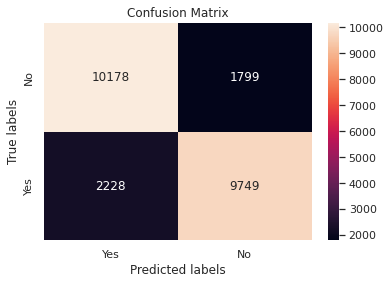

In [69]:

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test_v4,y_pred_v4), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [70]:
print(classification_report(y_test_v4,y_pred_v4)) # achei stranho

              precision    recall  f1-score   support

           0       0.82      0.85      0.83     11977
           1       0.84      0.81      0.83     11977

    accuracy                           0.83     23954
   macro avg       0.83      0.83      0.83     23954
weighted avg       0.83      0.83      0.83     23954



In [71]:
classification_metrics(y_test_v4,y_pred_v4)

accuracy_score:  0.8318861150538532
Area Under the curve (roc_auc_score):  0.8318861150538531
f1_score 0.8288204038257173
precision_score:  0.8442154485625216
Sensitivity:  0.8139767888452868
Specificity:  0.8497954412624197
FP rate:  0.15020455873758037


Sem grandes ganhos

### Modelo V5

In [72]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [73]:
LR_param_grid = {"penalty": ["l1","l2"],
                "C": [1000,100, 10, 1.0, 0.1, 0.01,0.001]}



lr = LogisticRegression(random_state=14,max_iter=500,solver='liblinear')
lr_grid = GridSearchCV(estimator= lr, param_grid = LR_param_grid, cv=5, scoring = "recall"  ,n_jobs=-1)
#lr_grid.fit(X_v1,y_v1)
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500, random_state=14,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [74]:
lr_grid.best_score_

0.3435974030710872

In [75]:
lr_grid.best_params_

{'C': 1000, 'penalty': 'l1'}

In [76]:
#best_paramns =  lr_grid.best_params_
#best_paramns.update({'solver':'liblinear'})
#lr_v5 = LogisticRegression(**best_paramns)
#lr_v5.fit(X_train,y_train)
#y_pred_v5 = lr_v5.predict(X_test)
#y_pred_prob_v5 = lr_v5.predict_proba(X_test)[:,1]

In [78]:
y_pred_v5 = lr_grid.predict(X_test)
y_pred_prob_v5 = lr_grid.predict_proba(X_test)[:,1]

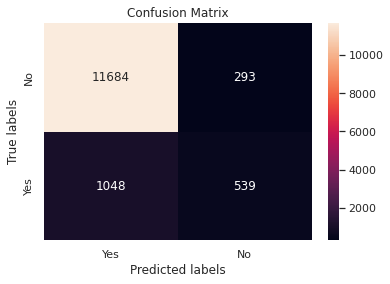

In [79]:

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_pred_v5), annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['No', 'Yes']);

In [80]:
print(classification_report(y_test,y_pred_v5))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11977
           1       0.65      0.34      0.45      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [81]:
classification_metrics(y_test,y_pred_v5)

accuracy_score:  0.901135358301386
Area Under the curve (roc_auc_score):  0.6575854877067204
f1_score 0.44563869367507236
precision_score:  0.6478365384615384
Sensitivity:  0.33963453056080656
Specificity:  0.9755364448526342
FP rate:  0.024463555147365784


estranhei a sensitividade dar baixa , mas o modelo aparentemente está melhor (acurácia e especificidade)

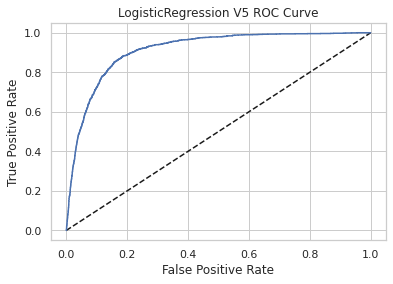

In [83]:
plot_roc_curve(y_test,y_pred_prob_v5,label_graph="LogisticRegression V5",title="LogisticRegression V5 ROC Curve")

# 5-) Avaliando modelos no escopo do negócio (situação hipotética )

- O que significa , em termos de retorno financeiro, ter um modelo melhor ? 
- "Quanto eu ganho com isso?

In [84]:
y_pred_v5

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
check_previsao = pd.DataFrame(
    {"y_test":y_test, 
    "y_pred_v5": y_pred_v5}
)

In [87]:
check_previsao

,y_test,y_pred_v5
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
13559,1,0
13560,0,0
13561,0,0
13562,0,0


In [113]:


#investimento = 10000
investimento = 15000
#custo = 15
custo =  40
receita = 100

# se a previsão é sim, a empresa liga para o cliente
c = np.where(check_previsao['y_pred_v5'] == 1, custo, 0 )

r = np.where(((check_previsao['y_pred_v5'] == 1) & ((check_previsao['y_test'] == 1) )), receita, 0 )

lucro_liquido = round(sum(r)-sum(c),2)

custo_total = round(sum(c),2)

custo_oportunidade = sum(np.where(((check_previsao['y_pred_v5'] == 0) & ((check_previsao['y_test'] == 1) )), (receita-custo), 0 ))

ROI = round((lucro_liquido/investimento)*100,2)

print("O lucro liquido é: R$", lucro_liquido)

print("O custo total é: R$", custo_total)

print("O ROI é: ", ROI, "%")

print("Custo de oportunidade: R$", custo_oportunidade)


O lucro liquido é: R$ 20620
O custo total é: R$ 33280
O ROI é:  137.47 %
Custo de oportunidade: R$ 62880


In [114]:
check_previsao['y_pred_v1'] = y_pred_v1

In [115]:
def aval_econ(true,pred,investimento =15000 ,custo = 40,receita=100):
    c = np.where(pred == 1, custo, 0 )

    r = np.where(((pred == 1) & ((true == 1) )), receita, 0 )
    
    lucro_liquido = round(sum(r)-sum(c),2)

    custo_total = round(sum(c),2)

    custo_oportunidade = sum(np.where(((pred == 0) & ((true == 1) )), (receita-custo), 0 ))

    ROI = round((lucro_liquido/investimento)*100,2)

    print("O lucro liquido é: R$", lucro_liquido)

    print("O custo total é: R$", custo_total)

    print("O ROI é: ", ROI, "%")

    print("Custo de oportunidade: R$", custo_oportunidade)
    


In [116]:
aval_econ(check_previsao['y_test'],check_previsao['y_pred_v1'])

O lucro liquido é: R$ 8400
O custo total é: R$ 124400
O ROI é:  56.0 %
Custo de oportunidade: R$ 15540


----

# Apêndice 

### Interpretando a regressão logística
- Não está tão "interpretável" por causa do pré-processamento , mas apenas para entender a "fórmula da regressão logística"

In [120]:
pd.DataFrame(X_v1)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.519481,0.092259,0.133333,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.000000,0.000000,0.000000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.080293,0.533333,0.198658,0.032258,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,0.688312,0.088501,0.533333,0.092721,0.016129,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,0.701299,0.124689,0.533333,0.229158,0.064516,0.212156,0.010909,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,0.506494,0.078868,0.533333,0.103294,0.048387,0.000000,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
print('intercept ', lr_v1.intercept_[0])
print('classes', lr_v1.classes_)
pd.DataFrame({'coeff': lr_v1.coef_[0]})

intercept  -1.3854728303095971
classes [0 1]


,coeff
0,0.235595
1,2.452499
2,0.005338
3,25.073141
4,-4.857813
5,-0.208956
6,0.995581
7,0.127516
8,-0.184583
9,-0.139910
